In [1]:
import torch
import numpy as np
import pytorch3d
import pytorch3d.io
import matplotlib.pyplot as plt
from pytorch3d.structures import Pointclouds
from pytorch3d.renderer import (
    AlphaCompositor,
    PointsRasterizationSettings,
    PointsRenderer,
    PointsRasterizer,
)
from pytorch3d.renderer import FoVPerspectiveCameras
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

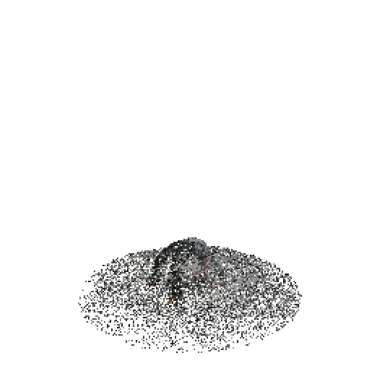

In [9]:
point_cloud_path="data/bridge_pointcloud.npz"
point_cloud = np.load(point_cloud_path)

points = torch.Tensor(point_cloud["verts"][::20]).to(device).unsqueeze(0)
rgb = torch.Tensor(point_cloud["rgb"][::20]).to(device).unsqueeze(0)

R, T = pytorch3d.renderer.look_at_view_transform(4, 10, 0)
cameras = FoVPerspectiveCameras(R=R, T=T, device=device)

image_size = 256
radius=0.003 
background_color=(1, 1, 1)

point_clouds = Pointclouds(points= points, features= rgb)
raster_settings = PointsRasterizationSettings(image_size=image_size, radius=radius,)
renderer = PointsRenderer(
        rasterizer = PointsRasterizer(raster_settings=raster_settings),
        compositor = AlphaCompositor(background_color = background_color),
    )
image = renderer(point_clouds, cameras = cameras)
image = image.cpu().numpy()[0, ..., :3]
plt.imshow(image)
plt.axis("off")
plt.show()
